In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import plotly.graph_objs as go

from tensorflow.keras import backend as K
from application.Inception.inceptionV1 import model_builder
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

In [2]:
inception = model_builder((224, 224, 3), 1000)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

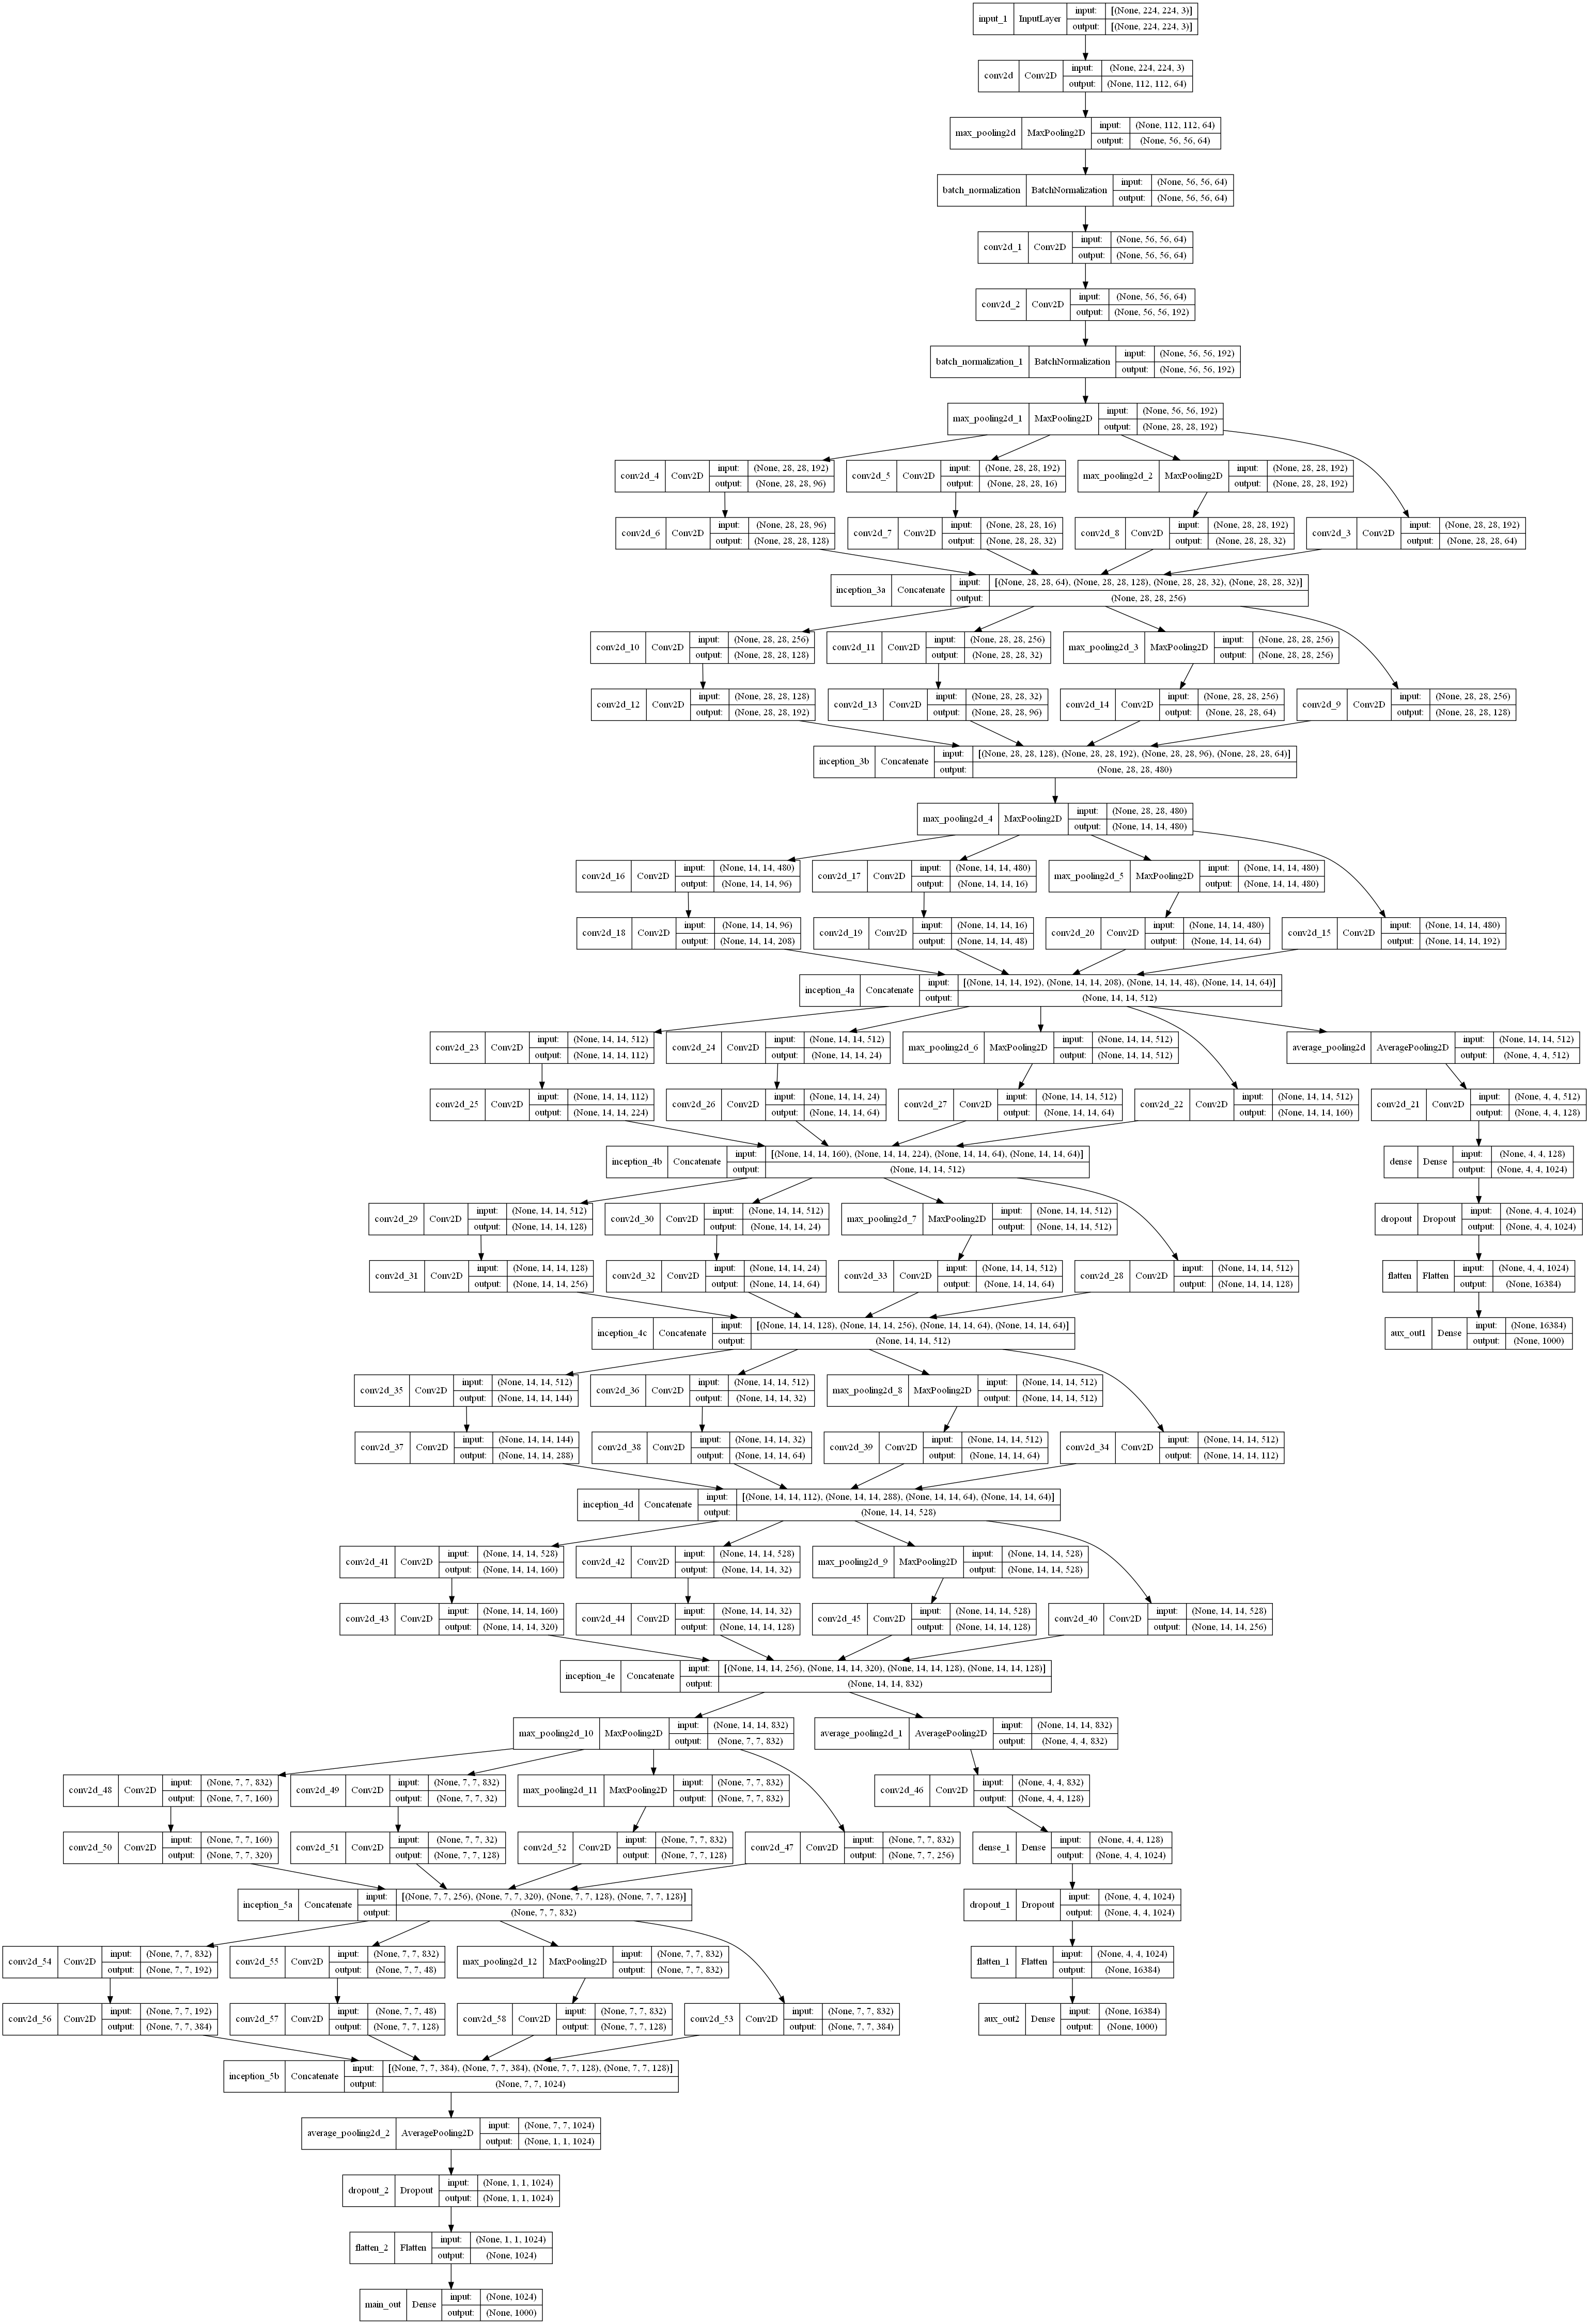

In [3]:
plot_model(inception, show_shapes=True, show_layer_names=True)

In [3]:
baseline = pd.read_pickle('../../../images/computer vision/Inception/inception_baseline_history.pkl')
ran_crop_inception = pd.read_pickle('../../../images/computer vision/Inception/inception_random_crop_history.pkl')
ran_crop_inception_aux = pd.read_pickle(
    '../../../images/computer vision/Inception/inception_aux_random_crop_history.pkl')

In [4]:
baseline

,loss,accuracy,f1_score,val_loss,val_accuracy,val_f1_score,lr
0,1.799063,0.290817,"[0.020905923, 0.0, 0.0, 0.05381944, 0.0, 0.0, ...",2.235962,0.128715,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.001
1,1.357233,0.481987,"[0.066225156, 0.44835967, 0.0, 0.45974457, 0.2...",2.062964,0.309524,"[0.0, 0.0, 0.0, 0.48955917, 0.055276383, 0.0, ...",0.001
2,1.008753,0.644872,"[0.2972259, 0.7250058, 0.0, 0.678577, 0.628250...",2.429252,0.387934,"[0.0, 0.354067, 0.0, 0.53877777, 0.0, 0.0, 0.4...",0.001
3,0.869024,0.714549,"[0.31277257, 0.77538747, 0.0, 0.7823025, 0.732...",2.149815,0.443788,"[0.028513236, 0.5870021, 0.0, 0.542654, 0.0379...",0.001
4,0.719965,0.771654,"[0.40183175, 0.818798, 0.0, 0.8588487, 0.76470...",2.076000,0.416756,"[0.3794038, 0.3837701, 0.0, 0.61432505, 0.2707...",0.001
5,0.650484,0.796796,"[0.4175458, 0.84994376, 0.0, 0.89184237, 0.794...",1.220951,0.562299,"[0.30276567, 0.44675738, 0.0, 0.6812091, 0.638...",0.001
6,0.606080,0.811743,"[0.4599567, 0.8586316, 0.0, 0.9043238, 0.82360...",1.015120,0.701575,"[0.078895465, 0.7533156, 0.0, 0.8101265, 0.706...",0.001
7,0.572219,0.820865,"[0.44, 0.85785085, 0.0, 0.91915154, 0.81766564...",2.722841,0.274257,"[0.012244898, 0.1108911, 0.0, 0.47445545, 0.14...",0.001
8,0.529057,0.834202,"[0.4703412, 0.89023846, 0.0, 0.92551064, 0.852...",1.011120,0.683494,"[0.0041580047, 0.7890661, 0.0, 0.79036003, 0.4...",0.001
9,0.498659,0.840487,"[0.4842437, 0.89537495, 0.0, 0.9310821, 0.8553...",1.364213,0.583065,"[0.07532957, 0.7438955, 0.0, 0.61226255, 0.492...",0.001


In [5]:
ran_crop_inception

,loss,accuracy,f1_score,val_loss,val_accuracy,val_f1_score,lr
0,1.681544,0.370814,"[0.002669277, 0.19397356, 0.0, 0.26642686, 0.0...",1.525238,0.454386,"[0.10363086, 0.25696006, 0.0, 0.3486558, 0.0, ...",0.001
1,1.442308,0.510022,"[0.041016947, 0.3793013, 0.0, 0.5695868, 0.149...",1.391722,0.520517,"[0.0049464144, 0.4838648, 0.0, 0.56767595, 0.5...",0.001
2,1.278953,0.581851,"[0.105826765, 0.4607846, 0.0, 0.666402, 0.5041...",1.249036,0.588187,"[0.0025717958, 0.4616412, 0.0, 0.6665933, 0.57...",0.001
3,1.202833,0.609413,"[0.15177348, 0.50318474, 0.0, 0.6994631, 0.594...",1.203773,0.610243,"[0.33632898, 0.5142017, 0.0, 0.70543176, 0.565...",0.001
4,1.145187,0.630282,"[0.20028251, 0.52934164, 0.0, 0.72089356, 0.63...",1.184637,0.610582,"[0.14126955, 0.58872014, 0.0, 0.58124554, 0.61...",0.001
5,1.108325,0.642614,"[0.22484456, 0.5442205, 0.0, 0.736832, 0.66021...",1.123485,0.636520,"[0.3111046, 0.59500456, 0.0, 0.73263454, 0.660...",0.001
6,1.076605,0.650949,"[0.22929935, 0.55813295, 0.0, 0.74550784, 0.68...",1.143577,0.625841,"[0.29545453, 0.5473125, 0.0, 0.6746837, 0.6576...",0.001
7,1.052327,0.660283,"[0.24917106, 0.56746984, 0.0, 0.75345457, 0.70...",1.129311,0.634785,"[0.16427547, 0.58786297, 0.0, 0.7438226, 0.605...",0.001
8,1.036030,0.665972,"[0.25738397, 0.5695105, 0.0, 0.7637421, 0.7138...",1.155989,0.631207,"[0.2729496, 0.615329, 0.0, 0.73950917, 0.69932...",0.001
9,1.021298,0.670809,"[0.26668492, 0.57909995, 0.0, 0.76838404, 0.72...",1.052237,0.654712,"[0.29041776, 0.5915675, 0.0, 0.70476264, 0.716...",0.001


In [6]:
ran_crop_inception_aux

,loss,main_out_loss,aux_out1_loss,aux_out2_loss,main_out_accuracy,main_out_f1_score,aux_out1_accuracy,aux_out1_f1_score,aux_out2_accuracy,aux_out2_f1_score,...,val_main_out_loss,val_aux_out1_loss,val_aux_out2_loss,val_main_out_accuracy,val_main_out_f1_score,val_aux_out1_accuracy,val_aux_out1_f1_score,val_aux_out2_accuracy,val_aux_out2_f1_score,lr
0,2.562194,1.600285,1.598547,1.607826,0.423122,"[0.010704623, 0.25950813, 0.0, 0.41679844, 0.1...",0.426174,"[0.029015545, 0.26129946, 0.0, 0.41632414, 0.1...",0.419304,"[0.012791175, 0.24949688, 0.0, 0.4148497, 0.11...",...,1.341204,1.357583,1.350401,0.559554,"[0.0002743108, 0.30522725, 0.0, 0.6124638, 0.5...",0.551467,"[0.020443844, 0.28530094, 0.0, 0.60409725, 0.4...",0.554497,"[0.0041022836, 0.29637697, 0.0, 0.61168283, 0....",0.001
1,2.053201,1.276606,1.294181,1.294483,0.582556,"[0.07900027, 0.45184132, 0.0, 0.6705728, 0.553...",0.576857,"[0.116565704, 0.4377645, 0.0, 0.6560822, 0.536...",0.577516,"[0.09047492, 0.44440752, 0.0, 0.6631197, 0.531...",...,1.323160,1.332030,1.333624,0.568356,"[0.20286907, 0.48737648, 0.0, 0.6717944, 0.610...",0.564516,"[0.12531328, 0.50892013, 0.0, 0.6665706, 0.606...",0.563907,"[0.14070351, 0.49967387, 0.0, 0.667528, 0.5812...",0.001
2,1.885878,1.169466,1.197900,1.190144,0.621023,"[0.13391197, 0.50161904, 0.0, 0.7149853, 0.652...",0.611915,"[0.15386169, 0.48458487, 0.0, 0.70059174, 0.62...",0.615943,"[0.13880673, 0.49361446, 0.0, 0.7075568, 0.634...",...,1.367625,1.428754,1.411373,0.556095,"[0.3649635, 0.44897956, 0.0, 0.5954833, 0.5808...",0.554699,"[0.37591872, 0.43601656, 0.0, 0.5977667, 0.540...",0.549177,"[0.39015338, 0.4324867, 0.0, 0.58928454, 0.563...",0.001
3,1.786176,1.104532,1.143455,1.128695,0.643096,"[0.1869471, 0.5330268, 0.0, 0.73730177, 0.6942...",0.631006,"[0.18238871, 0.5077818, 0.0, 0.71933526, 0.668...",0.635847,"[0.19125763, 0.5244083, 0.0, 0.72676516, 0.678...",...,1.360096,1.387244,1.376082,0.564945,"[0.19794917, 0.4392509, 0.0, 0.6931136, 0.5890...",0.556310,"[0.22418879, 0.4409384, 0.0, 0.68284035, 0.607...",0.557264,"[0.2189813, 0.42851862, 0.0, 0.6883545, 0.5990...",0.001
4,1.725406,1.065404,1.109228,1.090775,0.655150,"[0.19881783, 0.55129224, 0.0, 0.7498007, 0.715...",0.642002,"[0.19584484, 0.52870315, 0.0, 0.7331753, 0.693...",0.649128,"[0.19506292, 0.5410222, 0.0, 0.7405463, 0.7019...",...,1.141289,1.187567,1.145993,0.619478,"[0.1350006, 0.5674042, 0.0, 0.68190175, 0.5956...",0.609971,"[0.106111325, 0.54616, 0.0, 0.6543755, 0.58872...",0.619311,"[0.1246652, 0.5565421, 0.0, 0.66171956, 0.5830...",0.001
5,1.675128,1.032678,1.081383,1.060110,0.666927,"[0.23657718, 0.5715778, 0.0, 0.765592, 0.73434...",0.652979,"[0.2129087, 0.54647225, 0.0, 0.7476076, 0.7045...",0.659618,"[0.22231579, 0.5580983, 0.0, 0.7558234, 0.7167...",...,1.143452,1.209785,1.159454,0.625048,"[0.06920507, 0.5644875, 0.0, 0.7165065, 0.6865...",0.598998,"[0.019741414, 0.56073755, 0.0, 0.6586156, 0.65...",0.617474,"[0.038856205, 0.5564445, 0.0, 0.69182104, 0.68...",0.001
6,1.637862,1.008717,1.060165,1.036983,0.673174,"[0.24139854, 0.58141655, 0.0, 0.77290165, 0.74...",0.659653,"[0.22747484, 0.5582573, 0.0, 0.7560654, 0.7201...",0.665598,"[0.23707615, 0.5713158, 0.0, 0.7638855, 0.7309...",...,1.139943,1.160067,1.173897,0.635675,"[0.16360725, 0.55445814, 0.0, 0.74629235, 0.60...",0.633325,"[0.22257587, 0.547028, 0.0, 0.7478272, 0.64912...",0.628709,"[0.2084396, 0.5465523, 0.0, 0.73939127, 0.5782...",0.001
7,1.604940,0.987237,1.042286,1.016715,0.679905,"[0.25958568, 0.5916105, 0.0, 0.7790167, 0.7491...",0.665880,"[0.23483145, 0.56361, 0.0, 0.76221955, 0.72061...",0.672759,"[0.25185665, 0.5808971, 0.0, 0.7697372, 0.7364...",...,1.141278,1.160462,1.160658,0.621970,"[0.19438739, 0.54508764, 0.0, 0.7460642, 0.699...",0.620336,"[0.2629931, 0.5669923, 0.0, 0.7377956, 0.67865...",0.618989,"[0.22460596, 0.5537961, 0.0, 0.7398516, 0.6826...",0.001
8,1.575706,0.968123,1.025845,0.999436,0.686081,"[0.27897054, 0.5990891, 0.0, 0.7851552, 0.7626...",0.670782,"[0.25339493, 0

## Compare accuracy of each version of inception

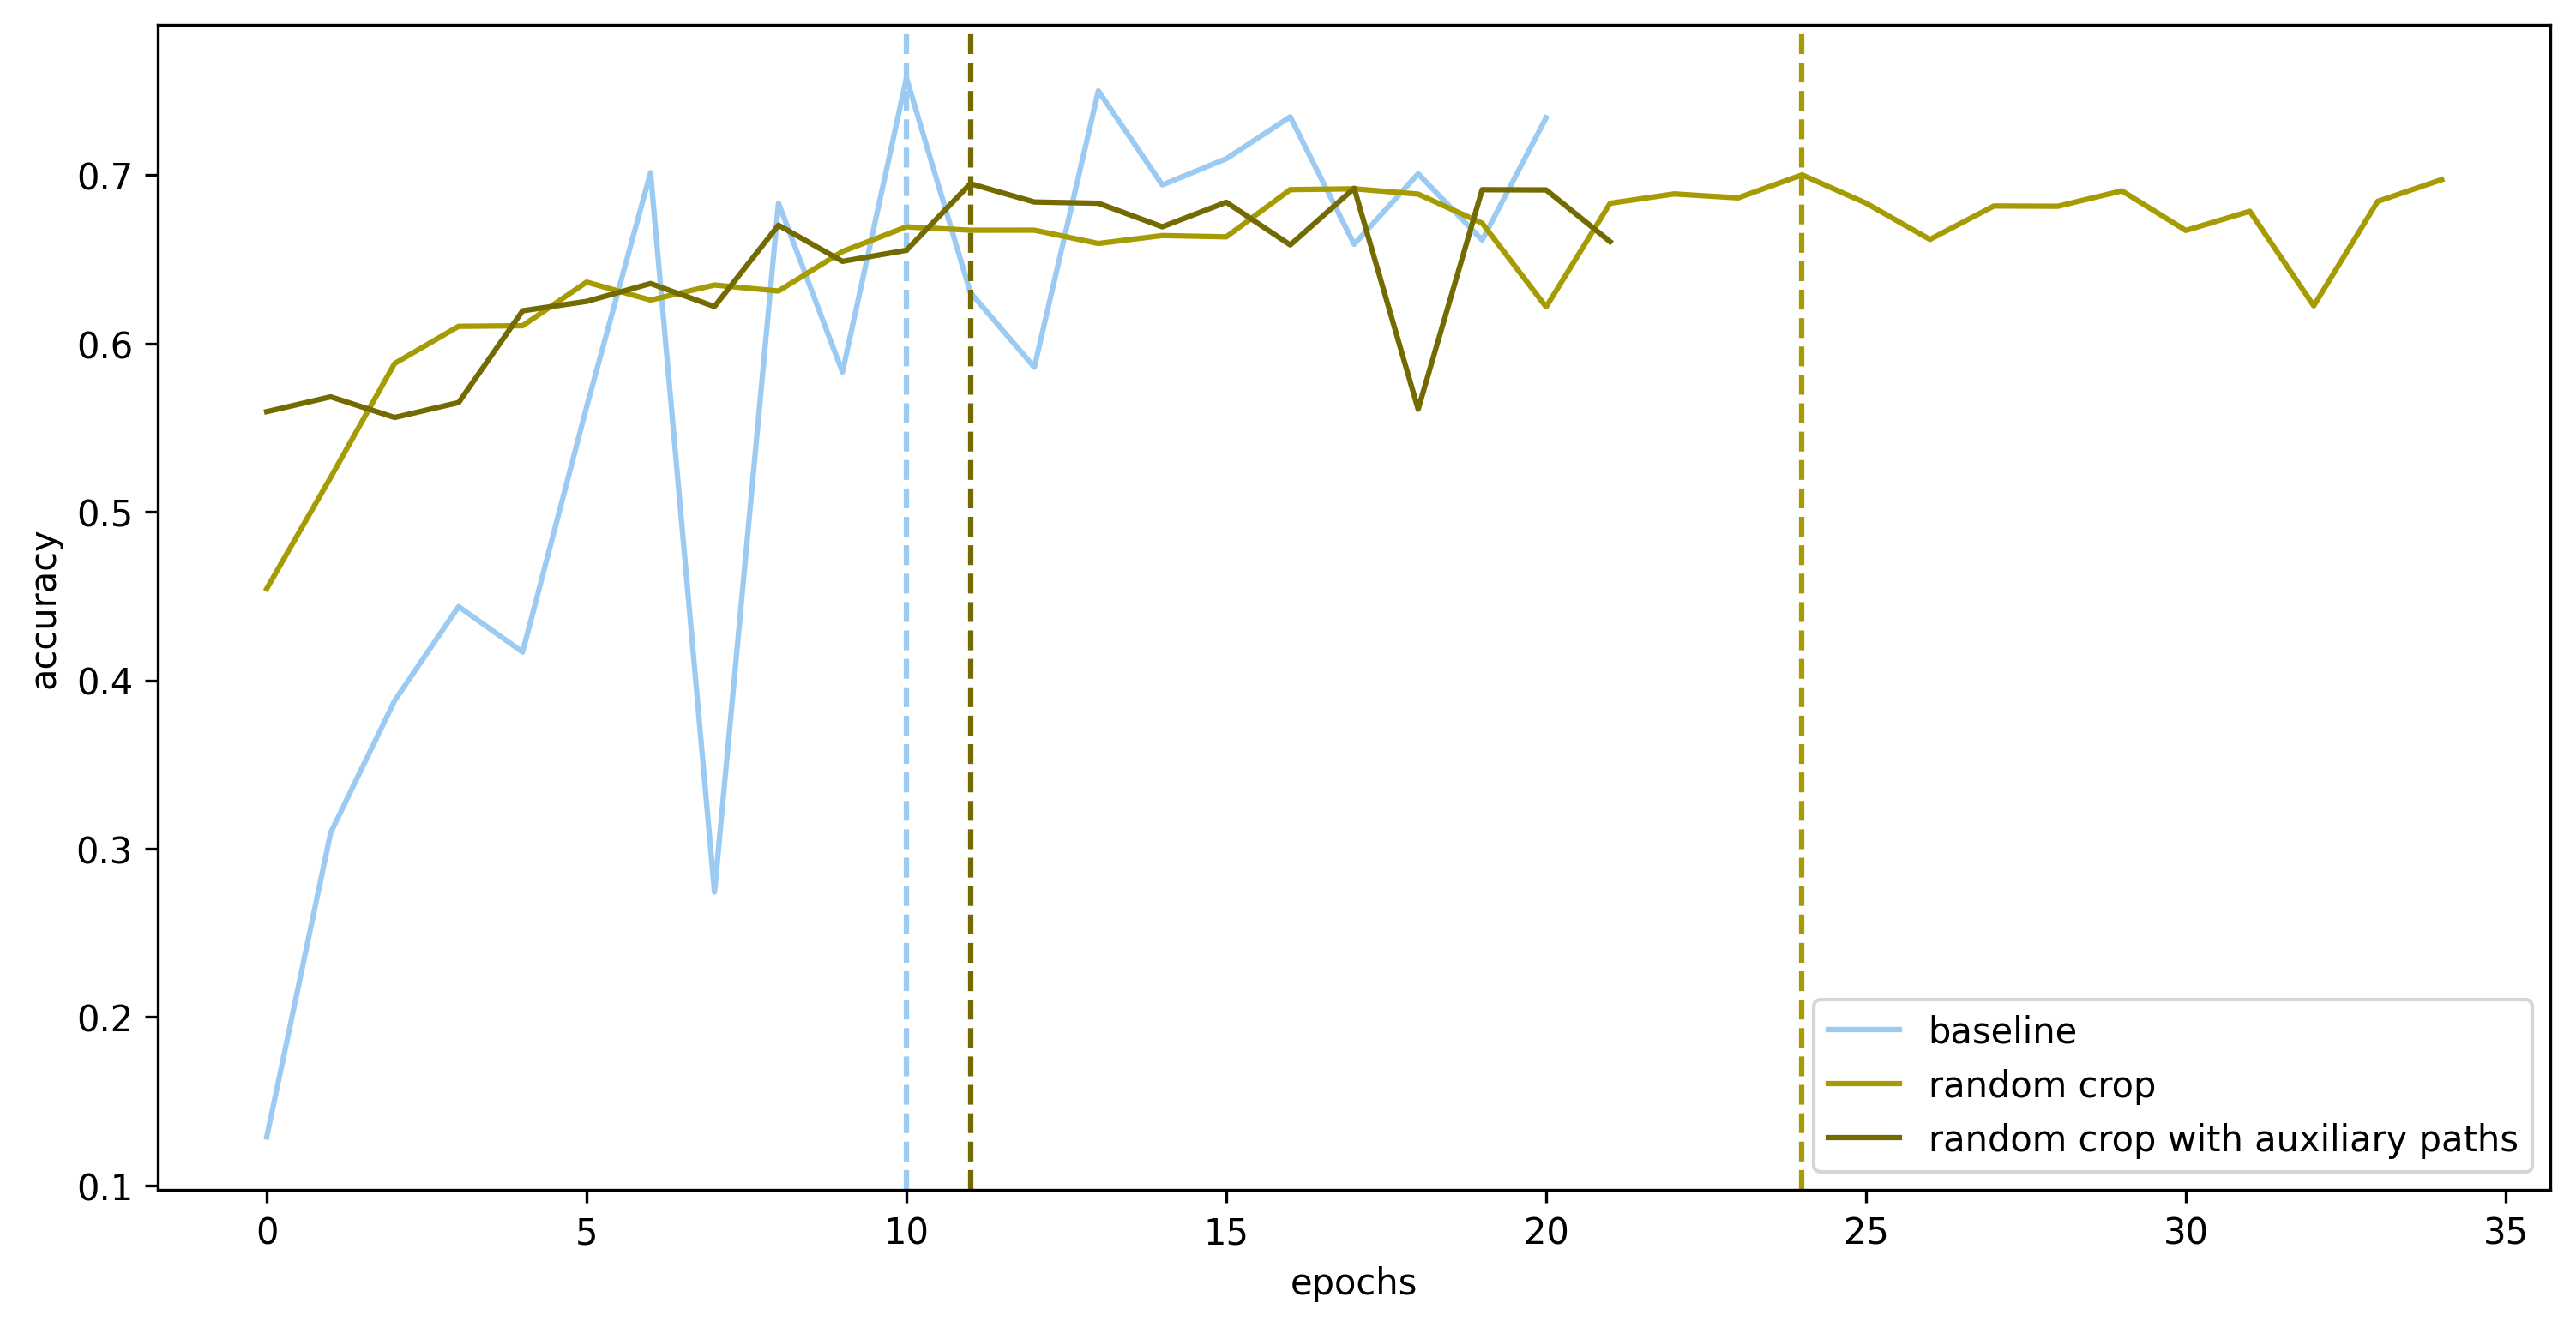

In [12]:
plt.figure(figsize=[12, 6], dpi=300)

sns.lineplot(x=list(range(baseline.shape[0])), y=baseline['val_accuracy'], color='#9BCAF2', label='baseline')
plt.axvline(x=np.argmin(baseline['val_loss']), color='#9BCAF2', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=ran_crop_inception['val_accuracy'], color='#A69B03',
             label='random crop')
plt.axvline(x=np.argmin(ran_crop_inception['val_loss']), color='#A69B03', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception_aux.shape[0])), y=ran_crop_inception_aux['val_main_out_accuracy'],
             color='#736B02', label='random crop with auxiliary paths')
plt.axvline(x=np.argmin(ran_crop_inception_aux['val_loss']), color='#736B02', linestyle='--')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.savefig('../../../images/computer vision/Inception/compare-versions.png')
plt.show()

## Compare loss of each version of inception

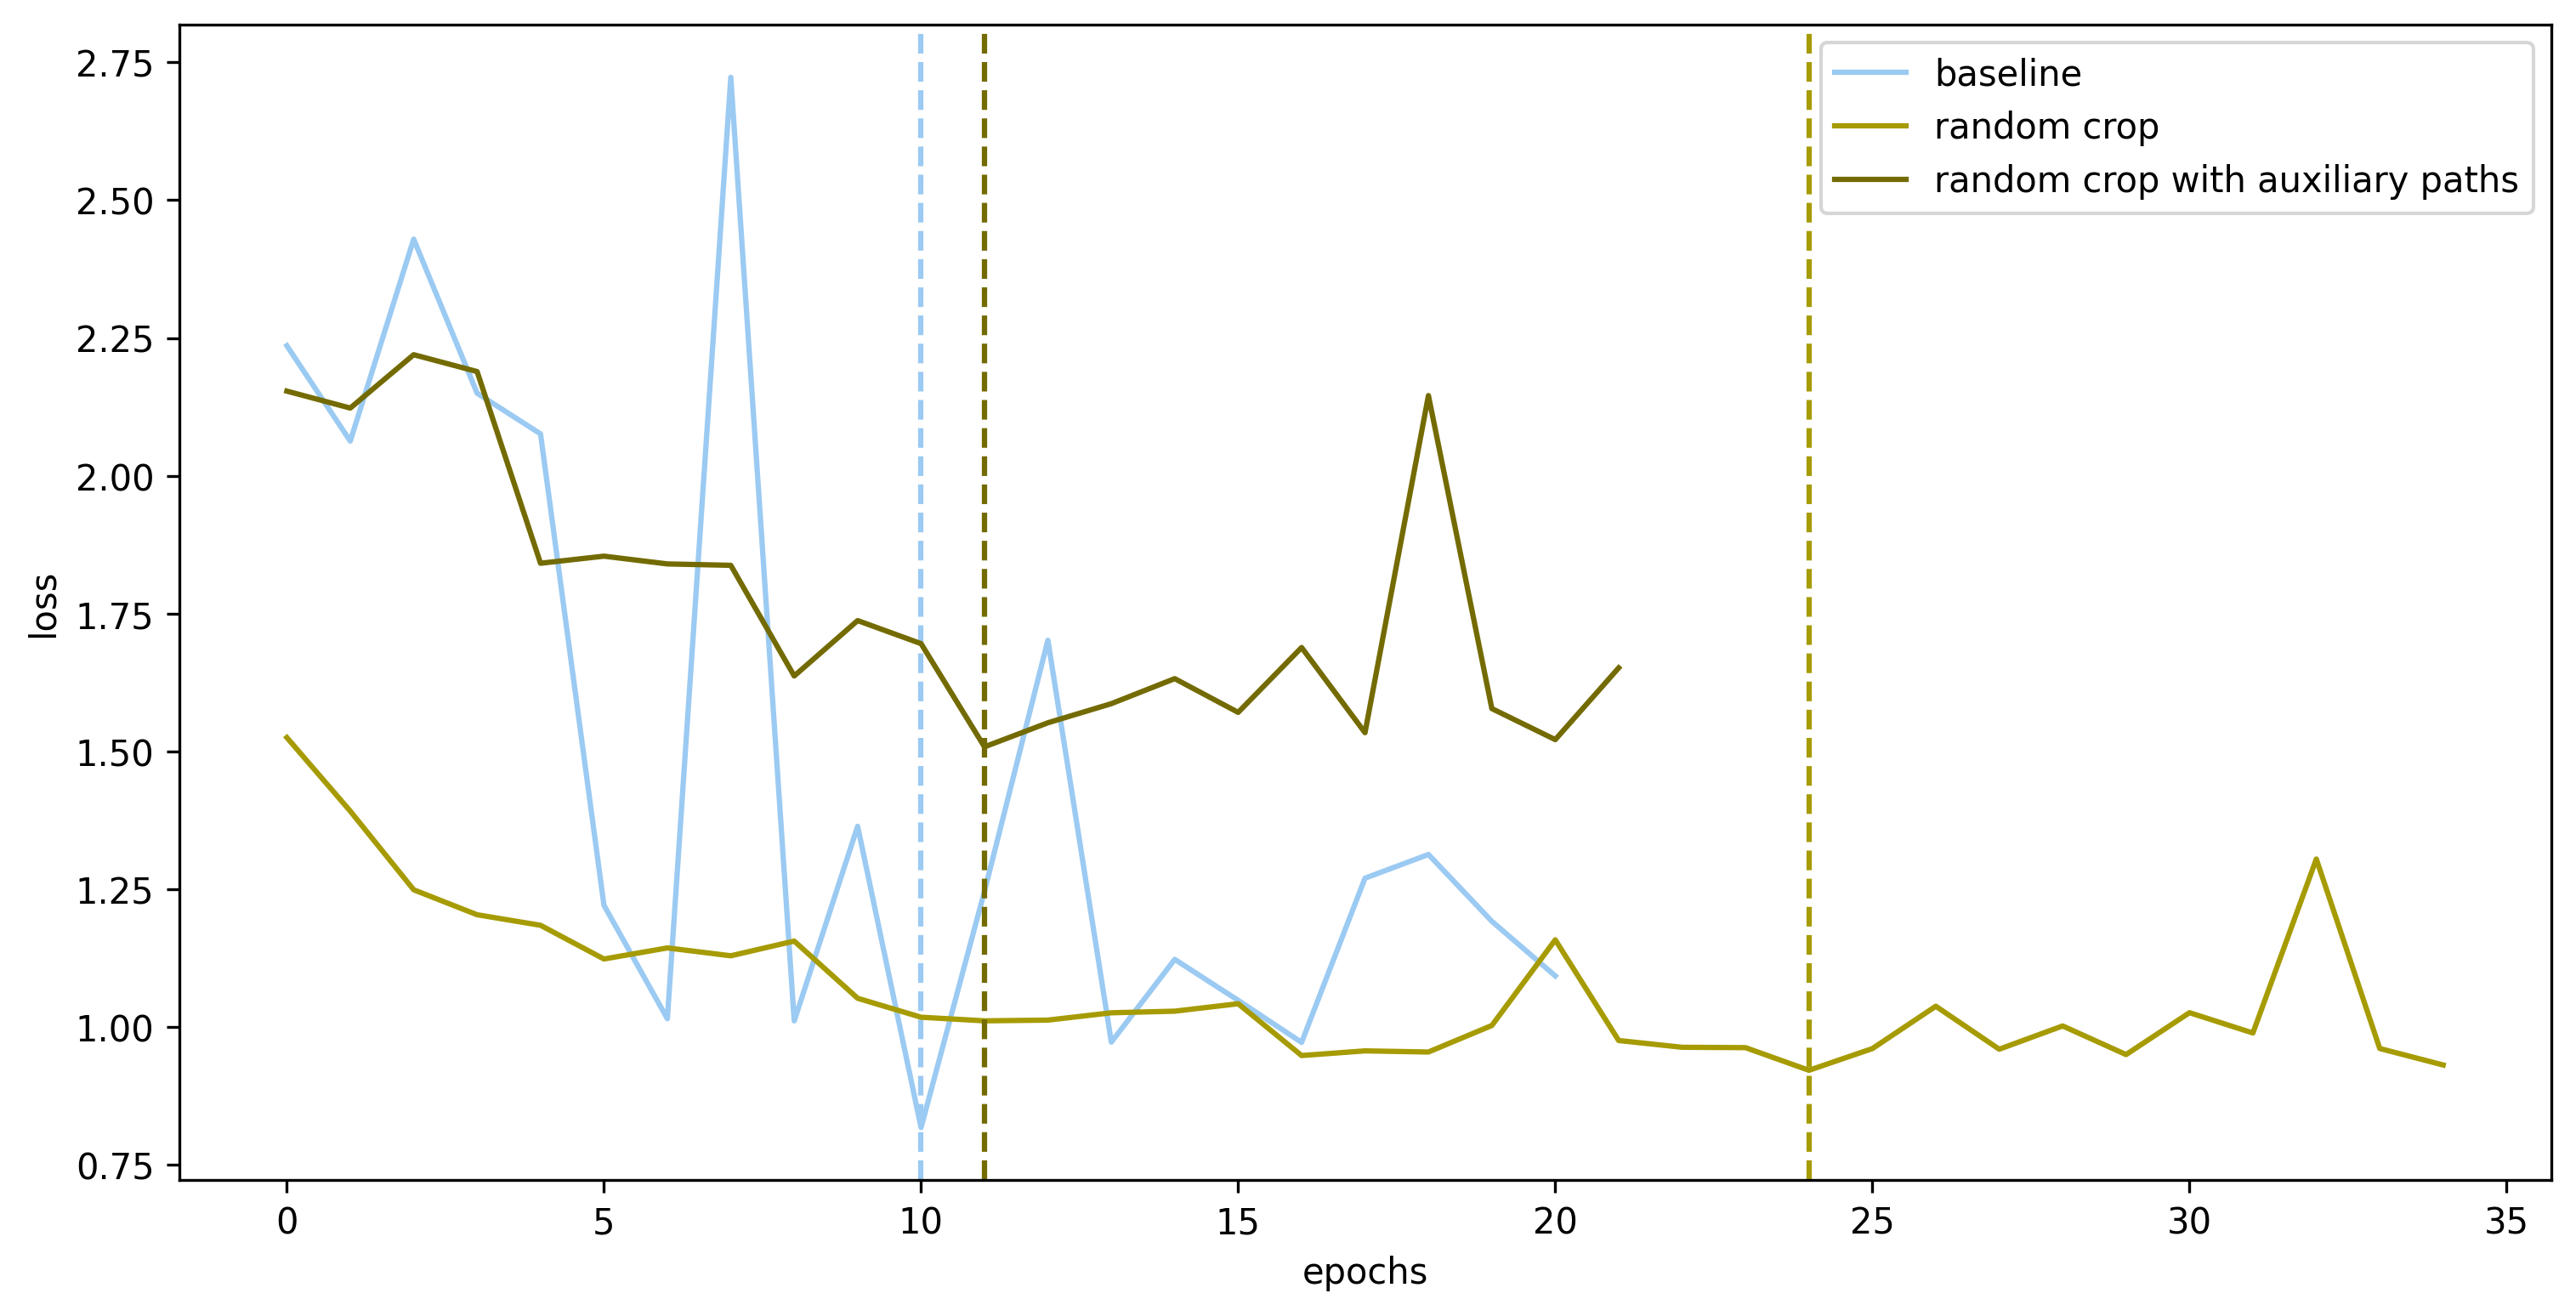

In [16]:
plt.figure(figsize=[12, 6], dpi=300)

sns.lineplot(x=list(range(baseline.shape[0])), y=baseline['val_loss'], color='#9BCAF2', label='baseline')
plt.axvline(x=np.argmax(baseline['val_accuracy']), color='#9BCAF2', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=ran_crop_inception['val_loss'], color='#A69B03',
             label='random crop')
plt.axvline(x=np.argmax(ran_crop_inception['val_accuracy']), color='#A69B03', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception_aux.shape[0])), y=ran_crop_inception_aux['val_loss'], color='#736B02',
             label='random crop with auxiliary paths')
plt.axvline(x=np.argmax(ran_crop_inception_aux['val_main_out_accuracy']), color='#736B02', linestyle='--')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.savefig('../../../images/computer vision/Inception/compare-versions-val-loss.png')
plt.show()

## compare training and validation loss of each inception model

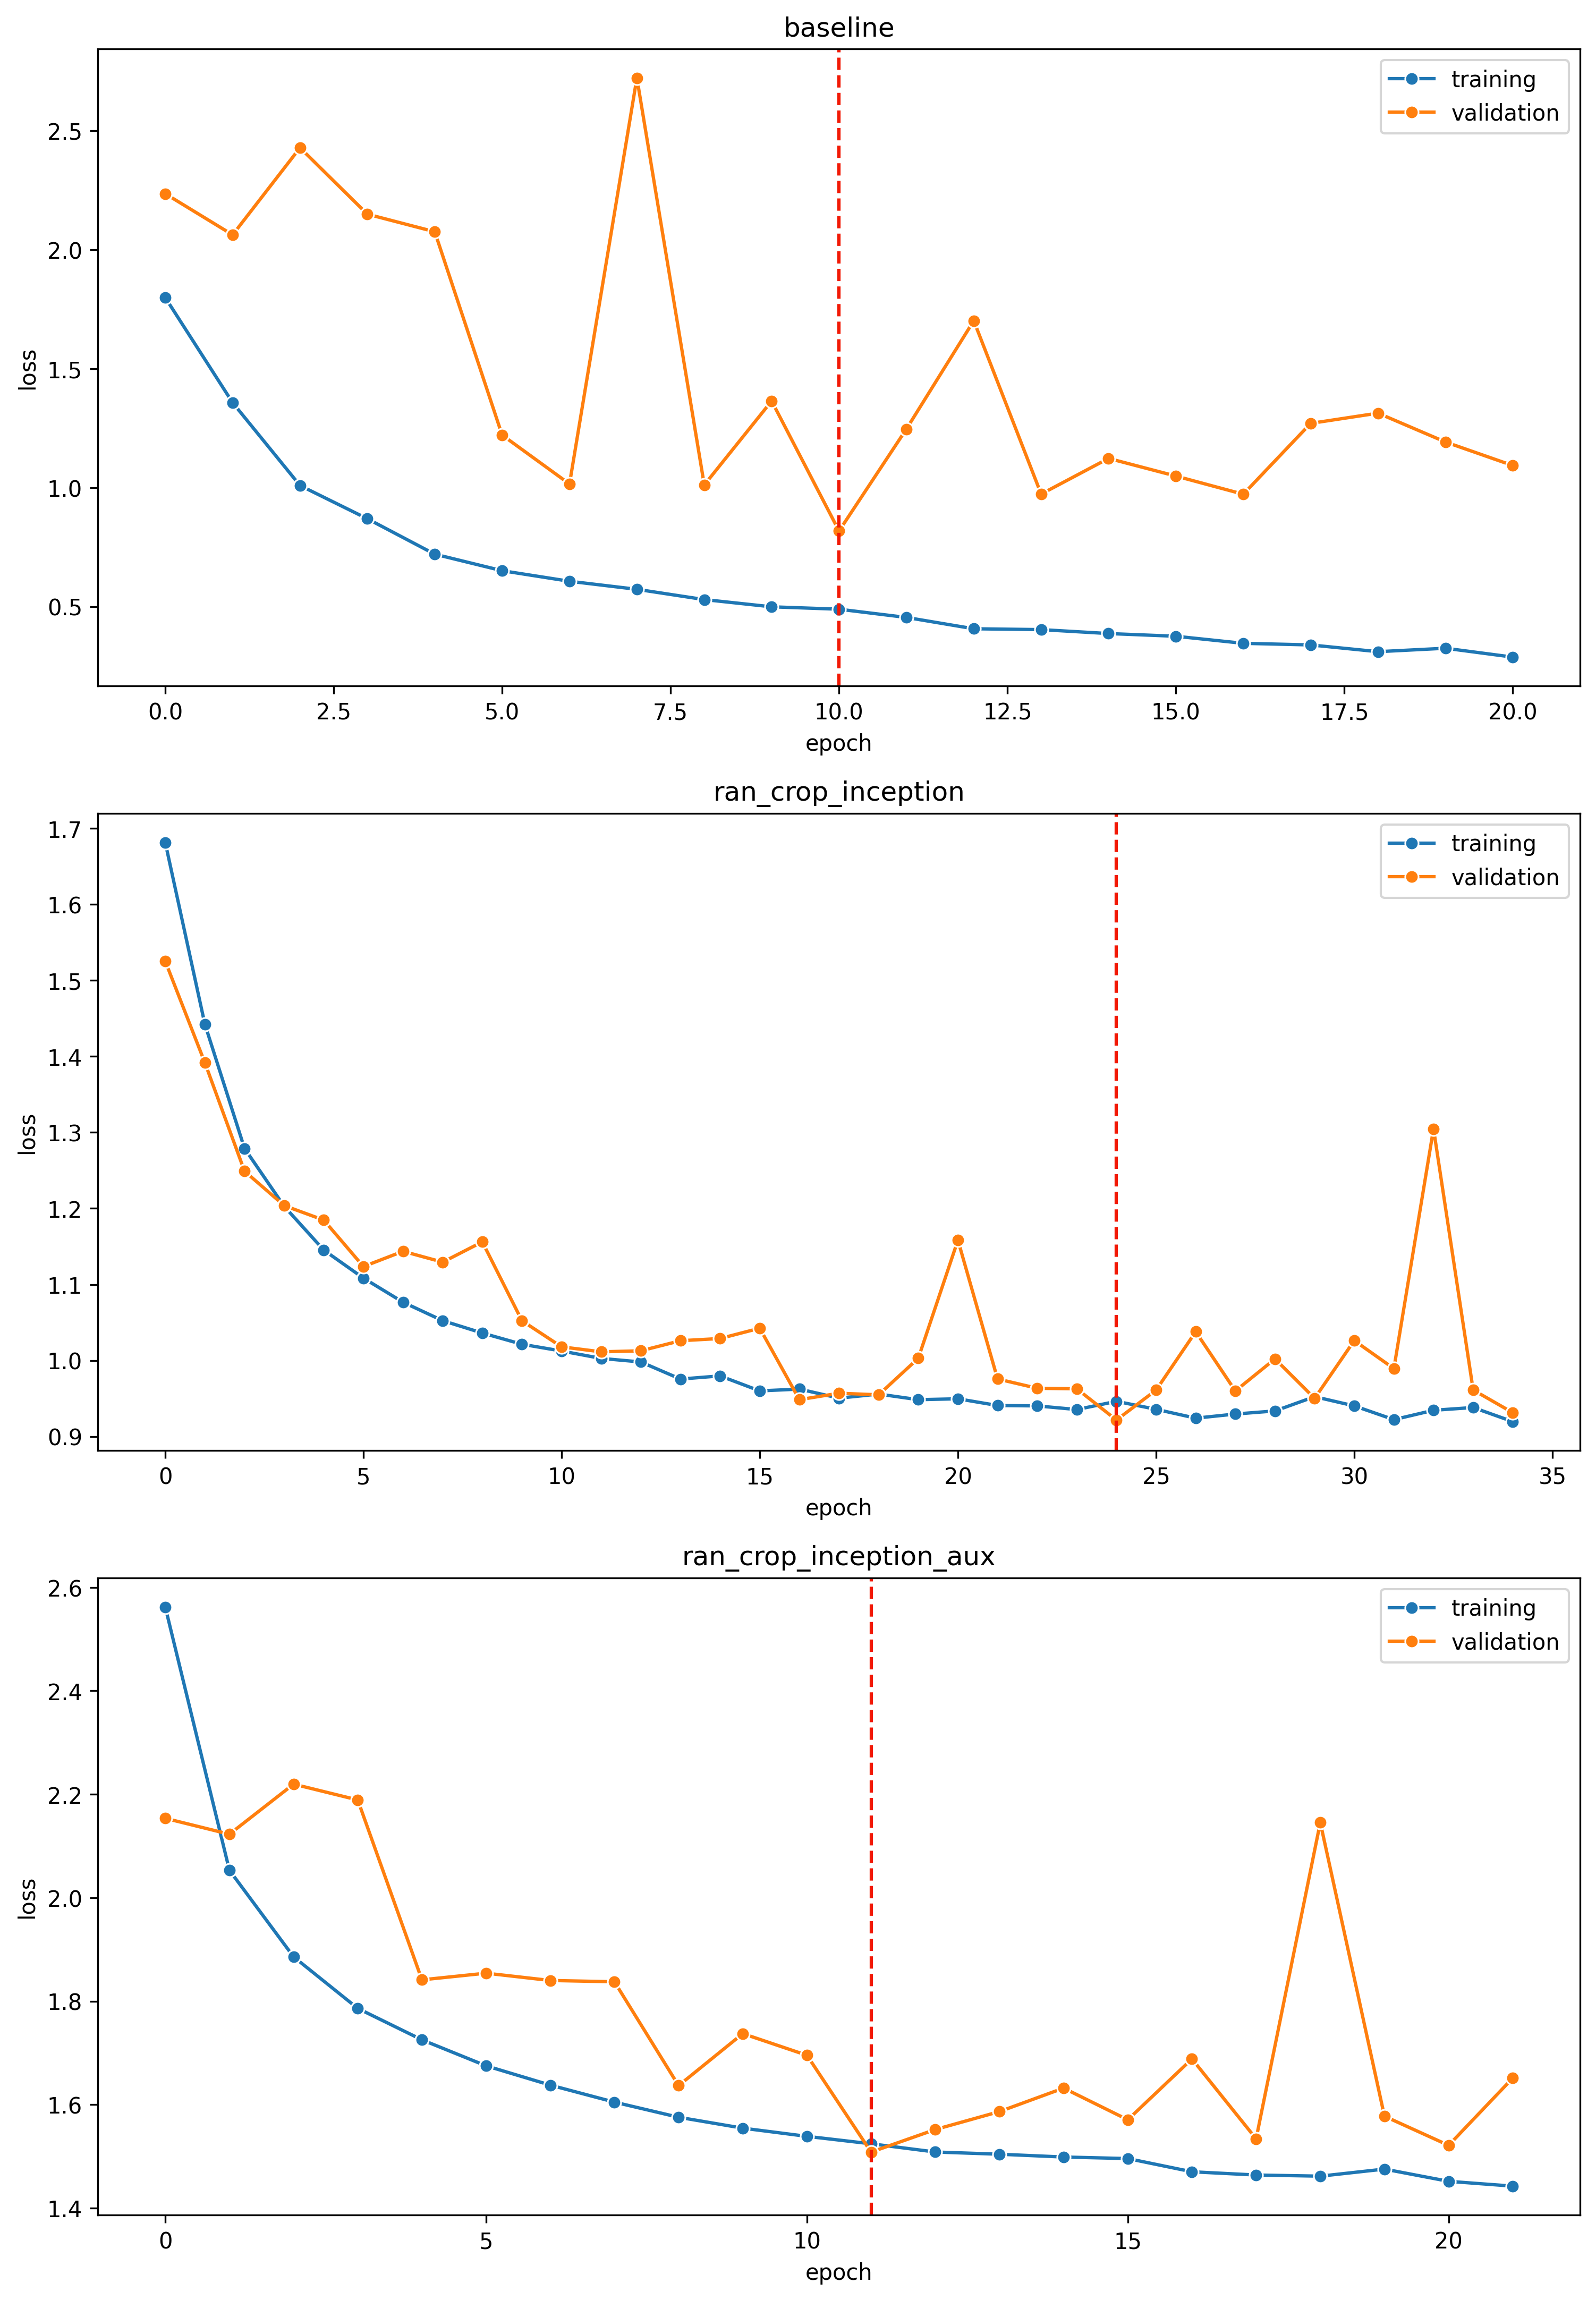

In [14]:
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=[12, 18], dpi=300)
axes = axes.ravel()
networks = ['baseline', 'ran_crop_inception', 'ran_crop_inception_aux']
versions = [baseline, ran_crop_inception, ran_crop_inception_aux]

for i in range(3):
    epochs = len(versions[i])

    sns.lineplot(x=list(range(epochs)),
                 y=versions[i]['loss'],
                 marker='o',
                 label='training',
                 ax=axes[i])
    sns.lineplot(x=list(range(epochs)),
                 y=versions[i]['val_loss'],
                 marker='o',
                 label='validation',
                 ax=axes[i])

    axes[i].axvline(x=np.argmin(versions[i]['val_loss']), color='#F21905', linestyle='--')
    axes[i].set_title(networks[i])
    axes[i].set_xlabel('epoch')
    axes[i].set_ylabel('loss')

plt.savefig('../../../images/computer vision/Inception/compare-version-losses.png')
plt.show()

## Compare amount of data how effect to model with 1:27 ratio of datapoints

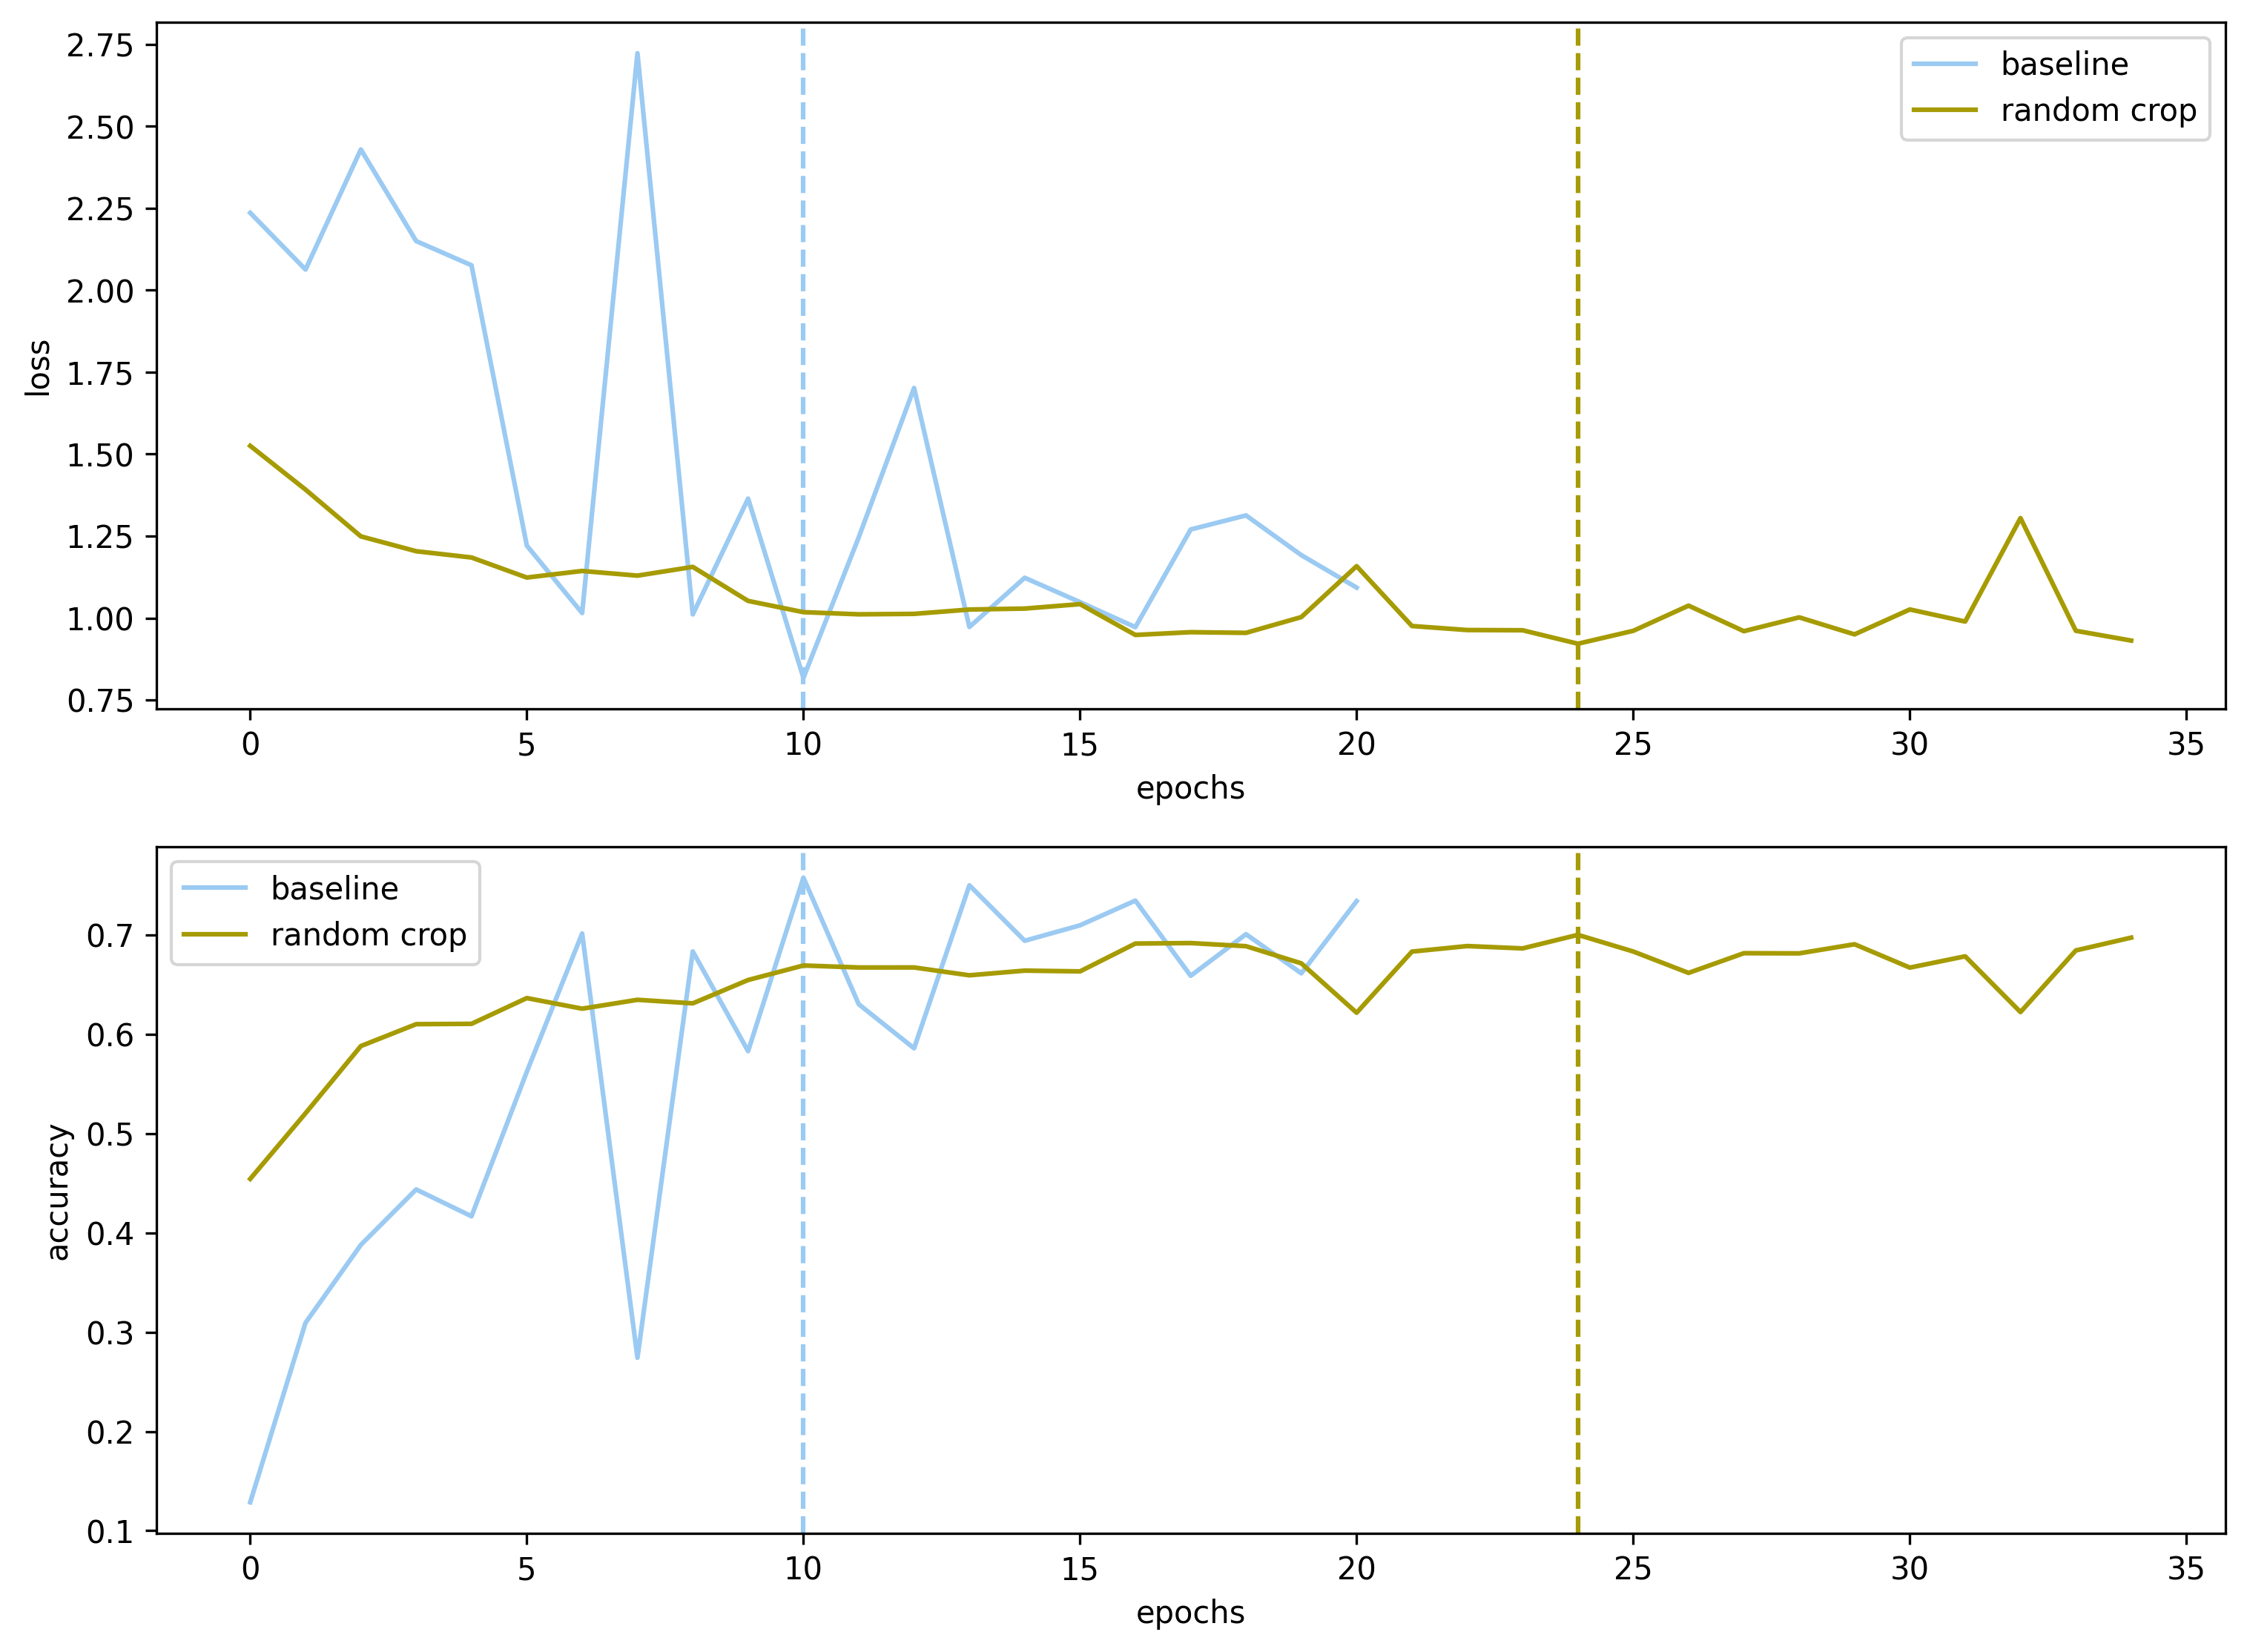

In [18]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=[12, 9], dpi=300)

sns.lineplot(x=list(range(baseline.shape[0])), y=baseline['val_loss'], color='#9BCAF2', label='baseline', ax=axes[0])
axes[0].axvline(x=np.argmax(baseline['val_accuracy']), color='#9BCAF2', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=ran_crop_inception['val_loss'], color='#A69B03',
             label='random crop', ax=axes[0])
axes[0].axvline(x=np.argmax(ran_crop_inception['val_accuracy']), color='#A69B03', linestyle='--')

sns.lineplot(x=list(range(baseline.shape[0])), y=baseline['val_accuracy'], color='#9BCAF2', label='baseline',
             ax=axes[1])
axes[1].axvline(x=np.argmin(baseline['val_loss']), color='#9BCAF2', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=ran_crop_inception['val_accuracy'], color='#A69B03',
             label='random crop', ax=axes[1])
axes[1].axvline(x=np.argmin(ran_crop_inception['val_loss']), color='#A69B03', linestyle='--')

axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')

plt.savefig('../../../images/computer vision/Inception/compare-versions-val-loss-and-accuracy(data).png')
plt.show()

In [61]:
baseline_mean_f1 = np.array(baseline['val_f1_score'][0])
ran_crop_inception_mean_f1 = np.array(ran_crop_inception['val_f1_score'][0])
ran_crop_inception_aux_mean_f1 = np.array(ran_crop_inception_aux['val_main_out_f1_score'][0])

for i in range(1, len(baseline['val_f1_score'])):
    baseline_mean_f1 = np.vstack((baseline_mean_f1, np.array(baseline['val_f1_score'][i])))

for i in range(1, len(ran_crop_inception['val_f1_score'])):
    ran_crop_inception_mean_f1 = np.vstack(
        (ran_crop_inception_mean_f1, np.array(ran_crop_inception['val_f1_score'][i])))

for i in range(1, len(ran_crop_inception_aux['val_main_out_f1_score'])):
    ran_crop_inception_aux_mean_f1 = np.vstack(
        (ran_crop_inception_aux_mean_f1, np.array(ran_crop_inception_aux['val_main_out_f1_score'][i]))
    )

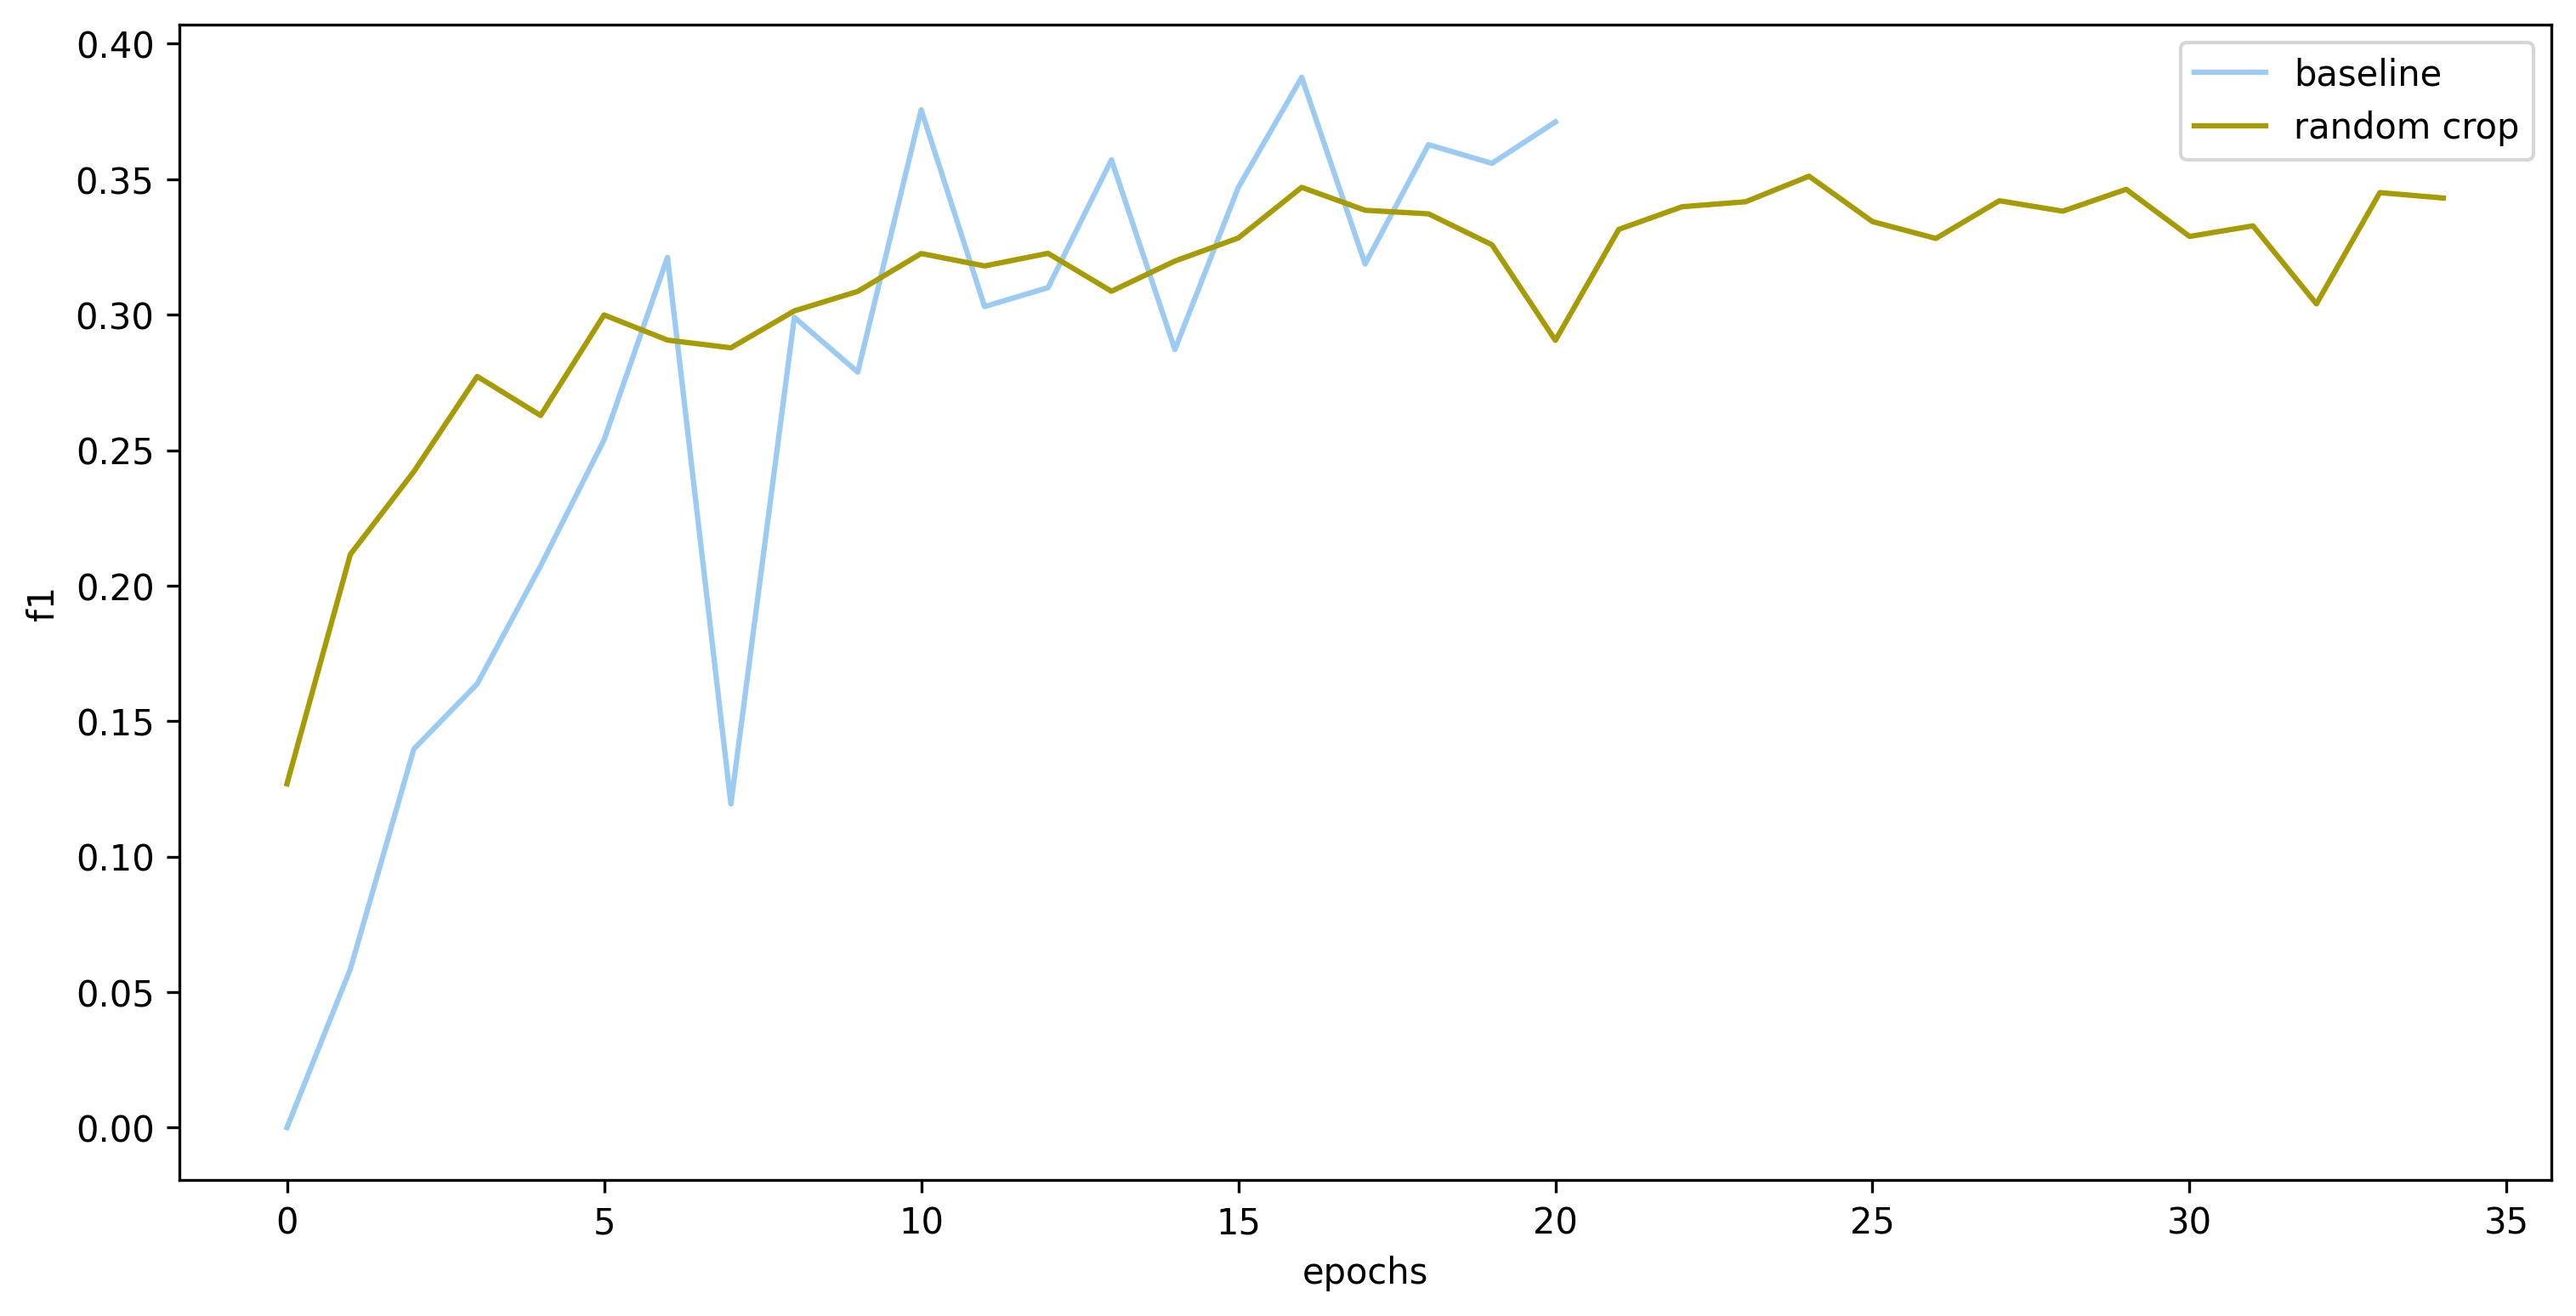

In [56]:
plt.figure(figsize=[12, 6], dpi=300)

sns.lineplot(x=list(range(baseline.shape[0])), y=np.mean(baseline_mean_f1, axis=1), color='#9BCAF2', label='baseline')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=np.mean(ran_crop_inception_mean_f1, axis=1), color='#A69B03',
             label='random crop')

plt.xlabel('epochs')
plt.ylabel('f1')

plt.savefig('../../../images/computer vision/Inception/compare-versions-val-f1.png')
plt.show()

## compare same amount of data sample with models having auxiliary paths

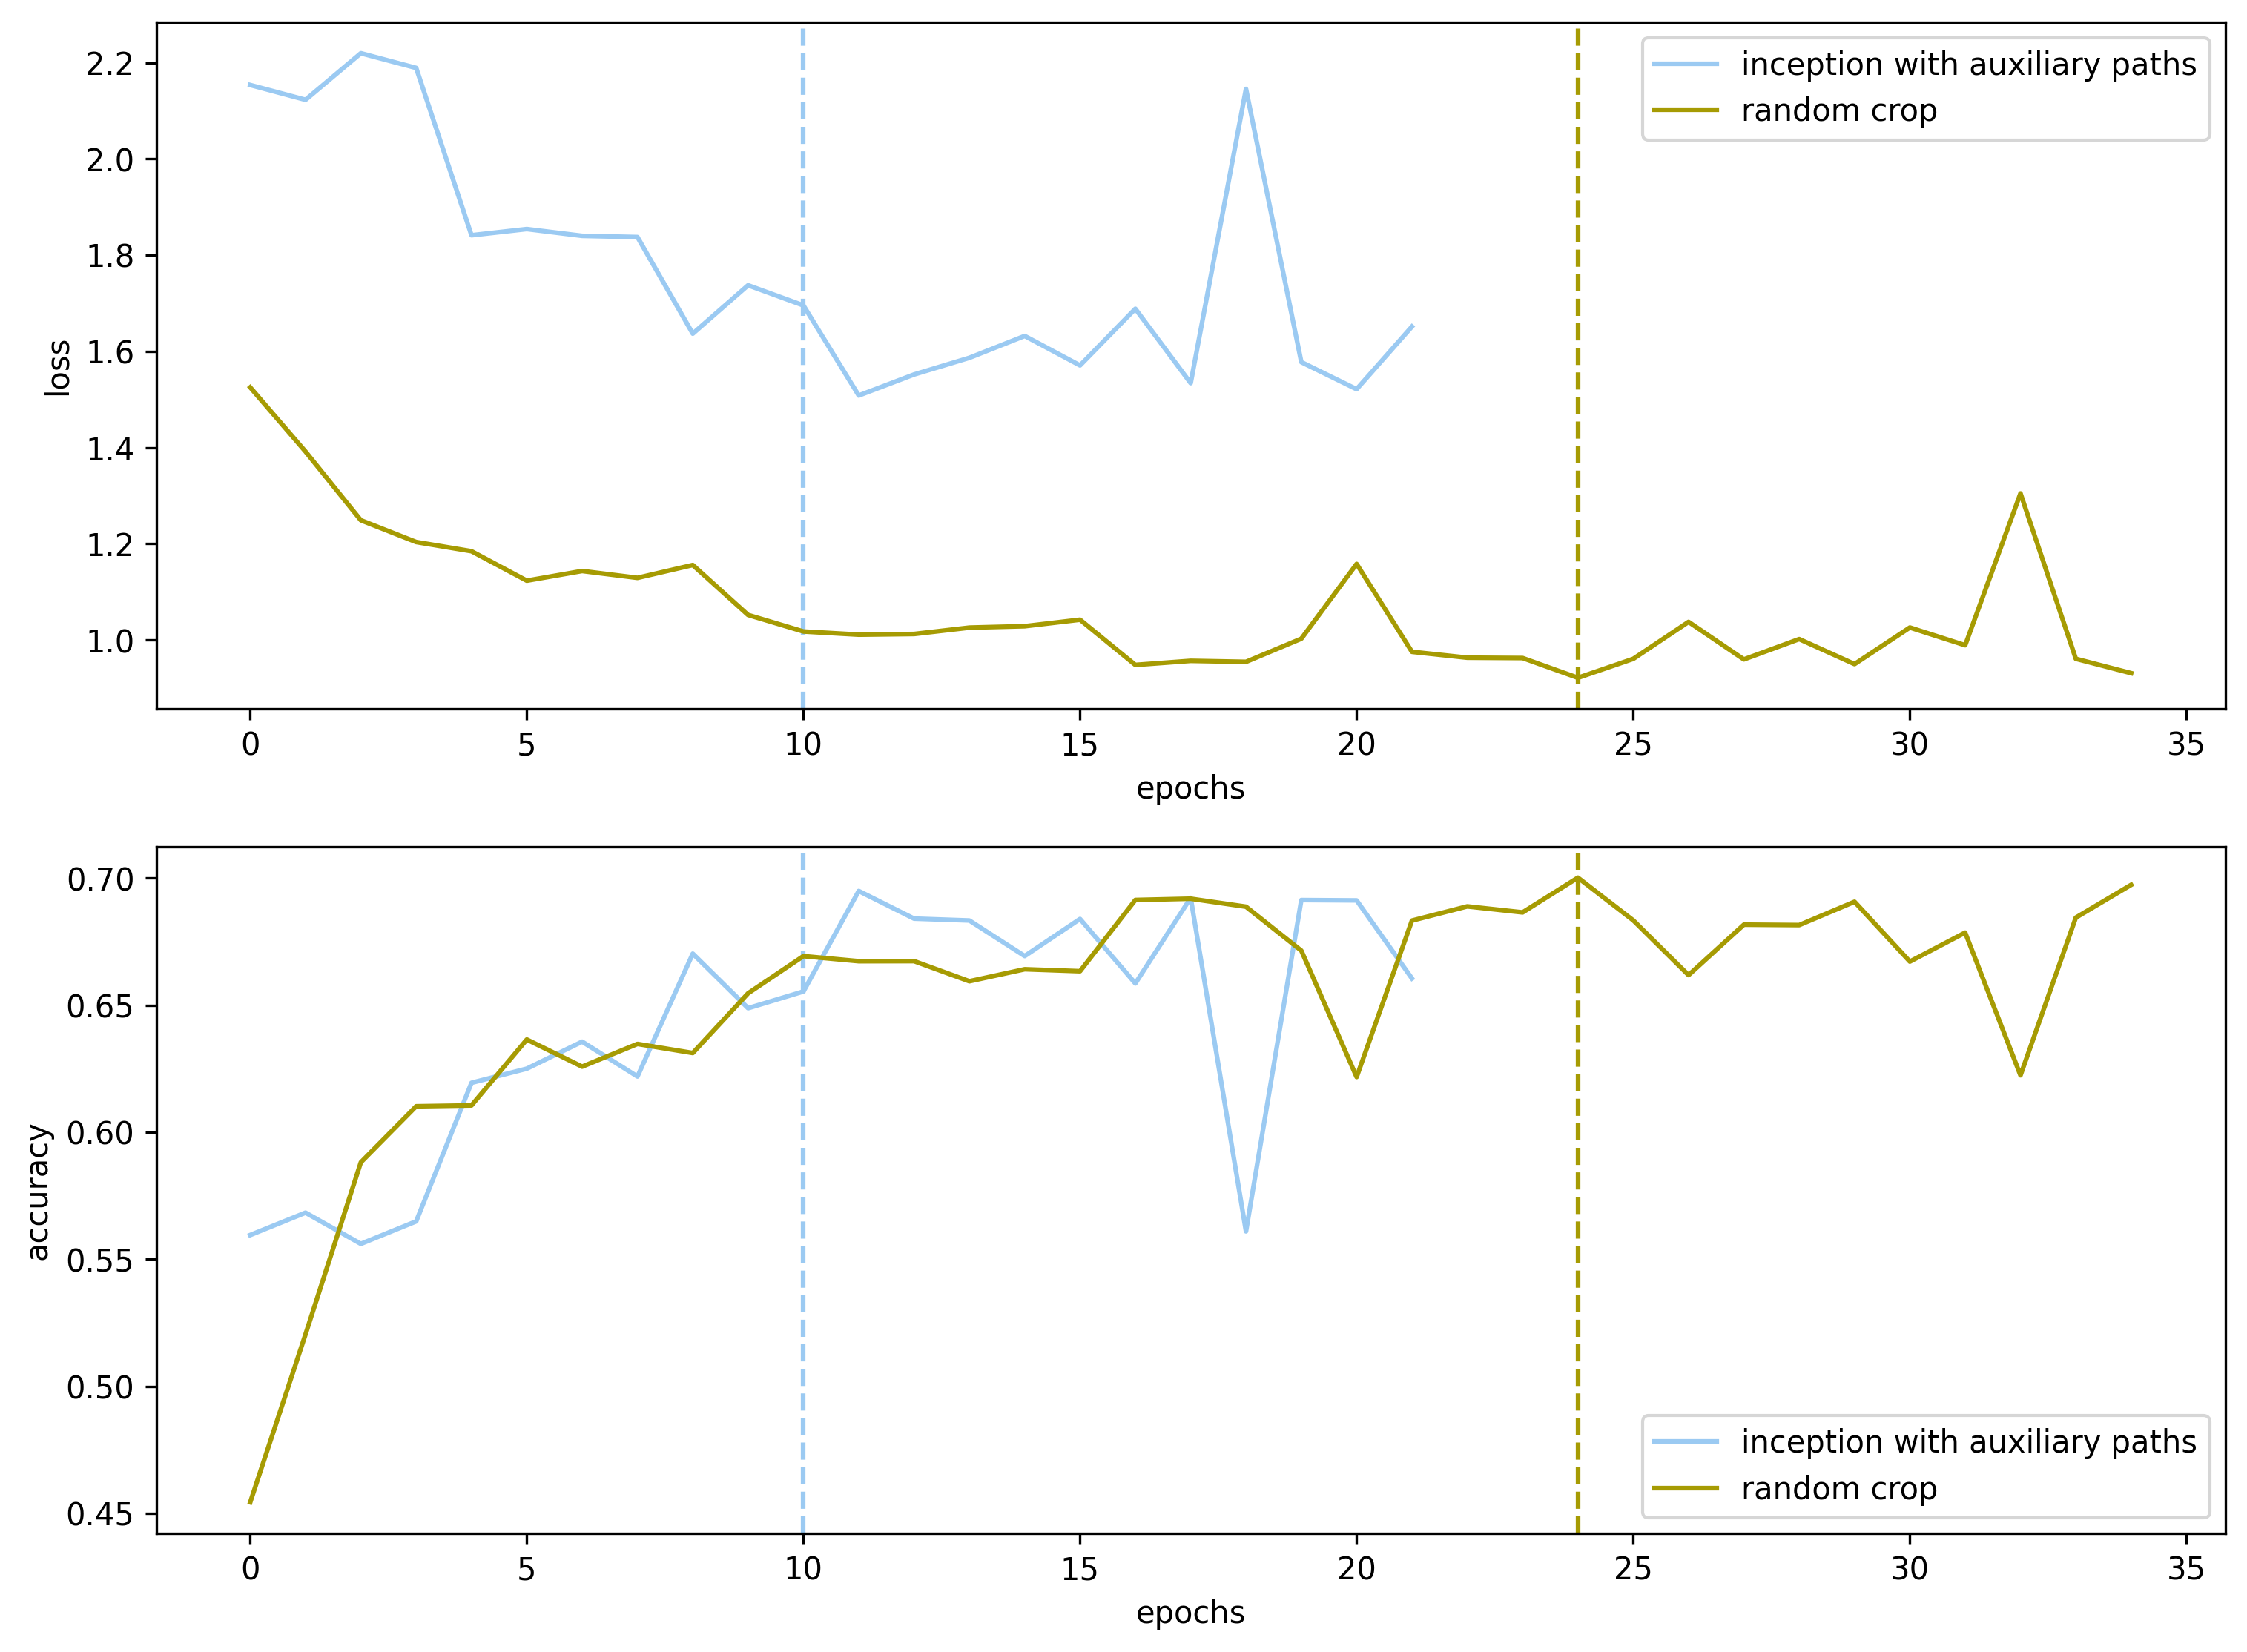

In [60]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=[12, 9], dpi=300)

sns.lineplot(x=list(range(ran_crop_inception_aux.shape[0])), y=ran_crop_inception_aux['val_loss'], color='#9BCAF2',
             label='inception with auxiliary paths', ax=axes[0])
axes[0].axvline(x=np.argmax(baseline['val_accuracy']), color='#9BCAF2', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=ran_crop_inception['val_loss'], color='#A69B03',
             label='random crop', ax=axes[0])
axes[0].axvline(x=np.argmax(ran_crop_inception['val_accuracy']), color='#A69B03', linestyle='--')

sns.lineplot(x=list(range(ran_crop_inception_aux.shape[0])), y=ran_crop_inception_aux['val_main_out_accuracy'],
             color='#9BCAF2', label='inception with auxiliary paths', ax=axes[1])
axes[1].axvline(x=np.argmin(baseline['val_loss']), color='#9BCAF2', linestyle='--')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=ran_crop_inception['val_accuracy'], color='#A69B03',
             label='random crop', ax=axes[1])
axes[1].axvline(x=np.argmin(ran_crop_inception['val_loss']), color='#A69B03', linestyle='--')

axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')

plt.savefig('../../../images/computer vision/Inception/compare-versions-val-loss-and-accuracy(aux).png')
plt.show()

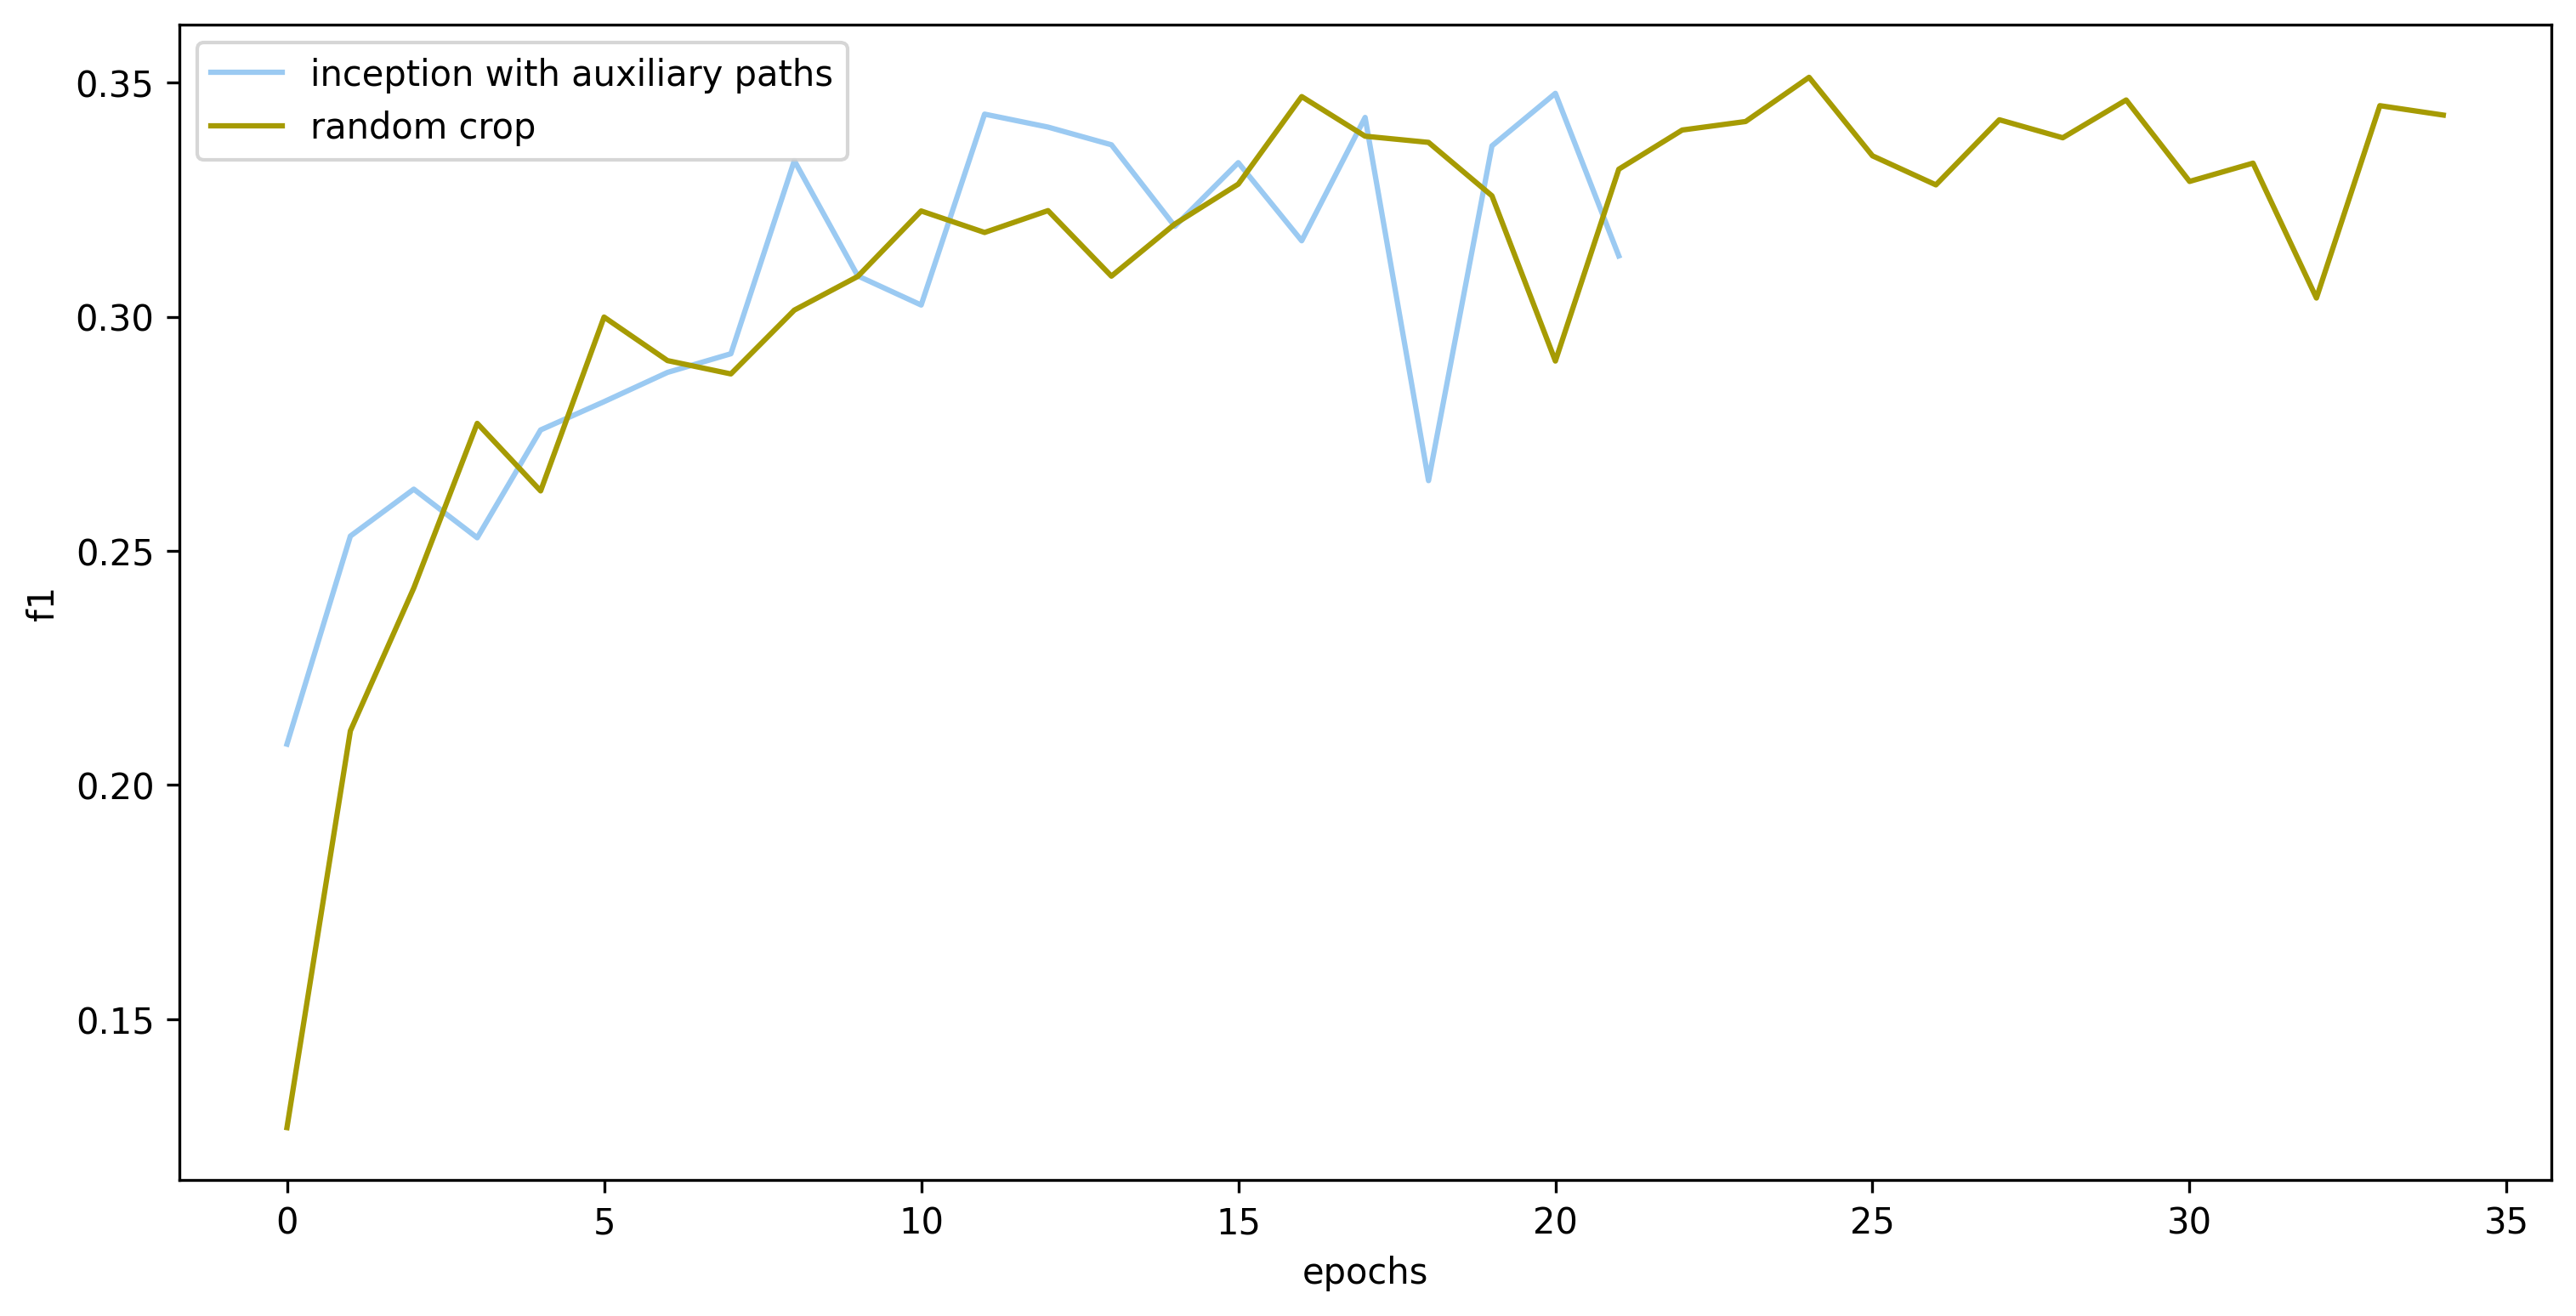

In [62]:
plt.figure(figsize=[12, 6], dpi=300)

sns.lineplot(x=list(range(ran_crop_inception_aux_mean_f1.shape[0])), y=np.mean(ran_crop_inception_aux_mean_f1, axis=1),
             color='#9BCAF2', label='inception with auxiliary paths')
sns.lineplot(x=list(range(ran_crop_inception.shape[0])), y=np.mean(ran_crop_inception_mean_f1, axis=1), color='#A69B03',
             label='random crop')

plt.xlabel('epochs')
plt.ylabel('f1')

plt.savefig('../../../images/computer vision/Inception/compare-architecture-val-f1.png')
plt.show()